In [90]:
!pip install -U scikit-fuzzy


Requirement already up-to-date: scikit-fuzzy in /usr/local/lib/python2.7/dist-packages (0.4.0)


In [0]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

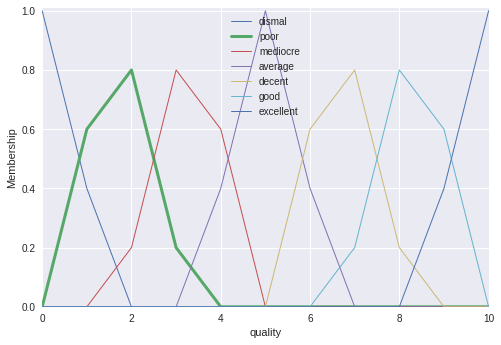

In [115]:
#advanced level tipping problem
#variables food quality, service as antecedents (input)
#tip as consequents(output)

ser = ctrl.Antecedent(np.arange(0,11,1),'service')
qual = ctrl.Antecedent(np.arange(0,11,1),'quality')
tip = ctrl.Consequent(np.arange(0,26,1),'tip')

qual.automf(7)
ser.automf(7)

tip['low'] = fuzz.trimf(tip.universe, [0,0,13])
tip['medium'] = fuzz.trimf(tip.universe, [0,13,25])
tip['high'] = fuzz.trimf(tip.universe, [13,25,25])

qual['poor'].view()



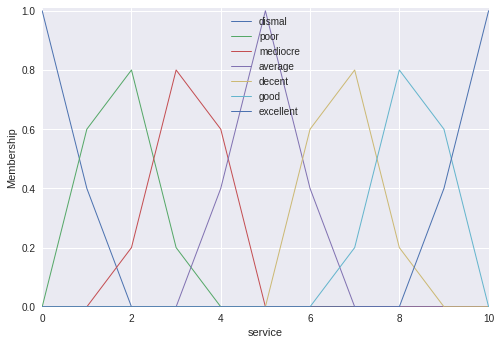

In [116]:
ser.view()

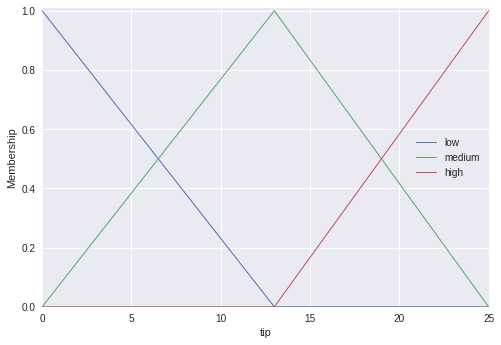

In [117]:
tip.view()


In [0]:
rule1 = ctrl.Rule((ser['dismal']|qual['dismal'])&(ser['poor']|qual['poor'])&(ser['poor']|qual['dismal'])&(ser['dismal']|qual['poor']), tip['low'])
rule2 = ctrl.Rule((ser['mediocre']|qual['mediocre'])&(ser['average']|qual['average'])&(ser['decent']|qual['decent']), tip['medium'])
rule3 = ctrl.Rule((ser['good']|qual['good'])&(ser['good']|qual['excellent'])&(ser['excellent']|qual['good'])&(ser['excellent']|qual['excellent']), tip['high'])

(<Figure size 576x396 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd2b6ffd850>)

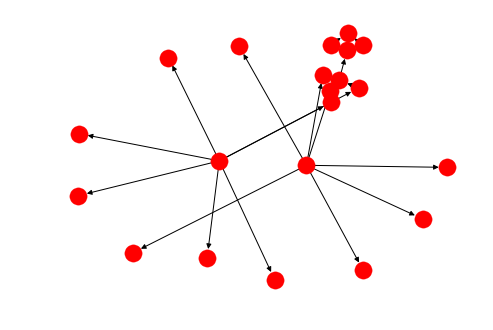

In [123]:
rule1.view()

In [0]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

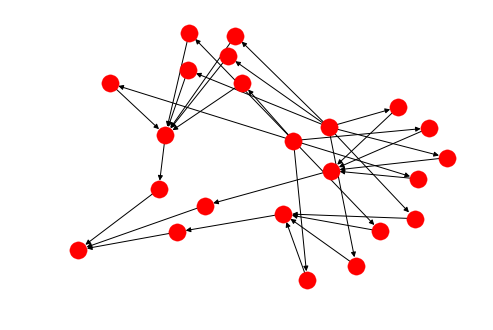

In [126]:
tipping_ctrl.view()

In [0]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

19.35234042553191


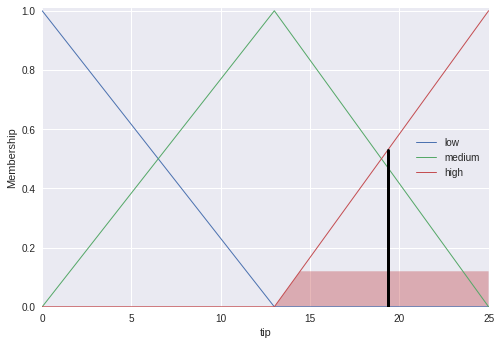

In [130]:
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8
tipping.compute()
print tipping.output['tip']
tip.view(sim=tipping)

19.84705882352941


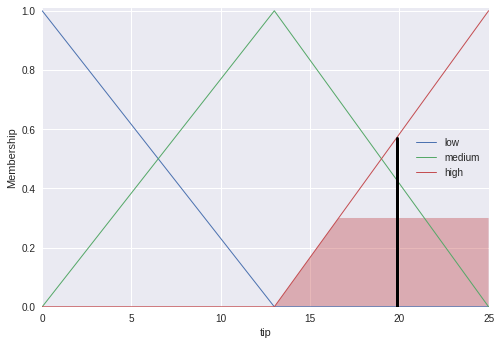

In [131]:
tipping.input['quality'] = 9.5
tipping.input['service'] = 4.8
tipping.compute()
print tipping.output['tip']
tip.view(sim=tipping)

5.3083333333333345


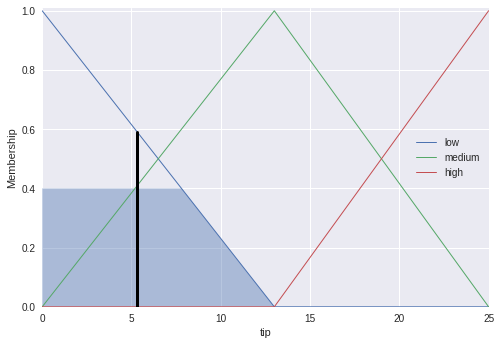

In [133]:
tipping.input['quality'] = 1
tipping.input['service'] = 2
tipping.compute()
print tipping.output['tip']
tip.view(sim=tipping)

12.59166666666666


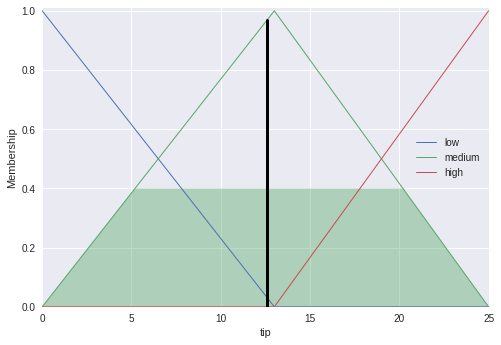

In [135]:
tipping.input['quality'] = 4
tipping.input['service'] = 6
tipping.compute()
print tipping.output['tip']
tip.view(sim=tipping)